In [1]:
using DelimitedFiles

In [2]:
using PyPlot

# ETAPA 1

## Módulo em $\mathbb{Z}_p$

In [3]:
#Função auxiliar que calcula o módulo de um número.
function modulo(a)
    if a >= 0
        return a
    end
    if a < 0
        return -a
    end
end

modulo (generic function with 1 method)

In [4]:
#Função auxiliar com o algoritmo da divisão.
function quociente(a,b)
    q = 0
    r = a
    
    while r < 0 || r >= b
        
        if a > 0
            q = q + 1
        else
            q = q - 1
        end
        
        r = a - q * b 
    end
    return r
    
end

quociente (generic function with 1 method)

In [5]:
#Calcula o módulo em Z_p.
function modp(n, p)
    #Se n pertence a Z_p, então n é equivalente a n módulo p
    if n < p && n > 0 
        return n
    end
    
    #Se n é maior que p ou menor que zero, então n é equivalente ao resto da divisão de n por p, em módulo p 
    if n >= p || n <= 0
        return quociente(n, p)
    end

end  

modp (generic function with 1 method)

### Exemplos:

In [6]:
modp(-3,3)

0

In [7]:
modp(-2,3)

1

In [8]:
modp(0,73)

0

In [9]:
modp(73,73)

0

## Inversa em $\mathbb{Z}_p$

In [10]:
#Calcula o valor inverso multiplicativo de n em módulo p.
function inversap(n, p)
    m = 0
    #Se n é múltiplo de p, então n não tem inverso em módulo p.
    if quociente(n, p) == 0 
        return 0
    else
        #Enquanto o produto de m por n em módulo p for diferente de 1, então adiciona 1 no valor de m, 
        #até que esse produto, em módulo p, seja igual a 1.
        while modp(m * n, p) != 1
            m = m + 1
        end
    return m 
    end
end

inversap (generic function with 1 method)

### Exemplos:

In [11]:
inversap(3, 5)

2

In [12]:
inversap(19, 7)

3

In [13]:
inversap(-1, 7)

6

In [14]:
inversap(19, 19)

0

## Cria a curva em $\mathbb{Z}_p$

In [15]:
#Esta função encontra o número de pontos que satisfazem a equação da curva elíptica e tais valores.
function cria_curva(a, b, p)
    c = 1
    Δ = 4 * (a ^ 3) + 27 * (b ^ 2)
   
    #Se o valor de Δ módulo p for equivalente a 0, então a curva é singular.
    if modp(Δ,p) == 0
        println("A curva é singular, escolha outros valores de a e b.")
        n = 0
        v = [ ]
    #Caso contrário, calculamos os pontos.
    #Para isto, criamos um arquivo de texto para armazenar os pontos, 
    #depois percorremos o conjunto Z_p para x e y.
    #Caso ambos os lados da equação da curva forem equivalentes em módulo p, então armazenamos no arquivo.
    else
        e = open("pontos.txt", "w")
        
        for x = 0 : (p - 1)
            t = modp((x ^ 3) + a * x + b, p)
            for y = 0 : (p - 1)
                if modp(y ^ 2, p) == t
                    write(e, " $(x) $(y) \n")
                end
            end
        end
        
        #Fechamos o arquivo.
        #Lemos o arquivo e colocamos os valores em uma matriz, 
        #de forma que os valores de x estarão na primeira coluna, e os valores de y na segunda coluna.
        #Por fim, vemos o número de linhas que tal matriz tem.
        close(e)
        v = readdlm("pontos.txt")
        n = size(v)[1]
    end
    return n, v
end                

cria_curva (generic function with 1 method)

### Exemplos:

In [16]:
cria_curva(0, 0, 7)

A curva é singular, escolha outros valores de a e b.


(0, Any[])

In [17]:
A = cria_curva(-1, 3, 11)

(16, [0.0 5.0; 0.0 6.0; … ; 10.0 5.0; 10.0 6.0])

In [18]:
display(A[2])

16×2 Array{Float64,2}:
  0.0   5.0
  0.0   6.0
  1.0   5.0
  1.0   6.0
  2.0   3.0
  2.0   8.0
  3.0   4.0
  3.0   7.0
  6.0   2.0
  6.0   9.0
  7.0   3.0
  7.0   8.0
  8.0   1.0
  8.0  10.0
 10.0   5.0
 10.0   6.0

In [19]:
B = cria_curva(-1, 3, 5)

(2, [2.0 2.0; 2.0 3.0])

In [20]:
C = cria_curva(-1, 1, 23)

A curva é singular, escolha outros valores de a e b.


(0, Any[])

In [21]:
typeof(C[2])

Array{Any,1}

## Desenha a curva elíptica em $\mathbb{Z}_p$

In [22]:
#Extra
function curva_eliptica(a, b, p)
    axis("equal")
    #Usamos a matriz com os valores que cria_curva devolve e plotamos no pĺano.
    M = cria_curva(a, b, p)[2]
    PyPlot.plot(M[:, 1], M[:, 2], "bo", markersize=5)
end    

curva_eliptica (generic function with 1 method)

### Exemplos:

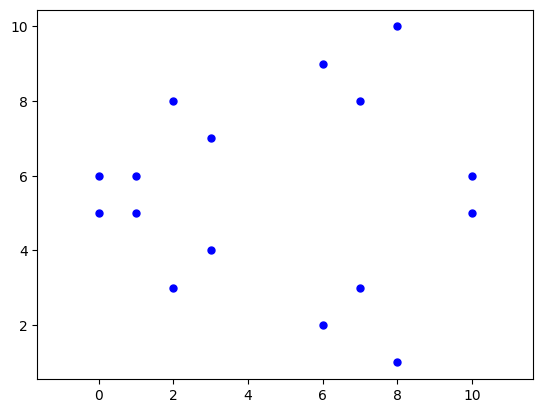

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f595617e470>

In [23]:
curva_eliptica(-1, 3, 11)

# ETAPA 2


## Soma dos pontos da curva

In [24]:
# Essa função soma os pontos da curva
function soma_pontos_curva(P, Q, a, b, p)
    # Nomeamos as coordenadas dos pontos
    x1 = P[1]
    y1 = P[2]
    x2 = Q[1]
    y2 = Q[2]
   
    # Elemento neutro
    if x1 == Inf && y1 == Inf
        S = [x2, y2]
        return S
    end
    
    if x2 == Inf && y2 == Inf
        S = [x1, y1]
        return S
    end
   
    # A soma como se pediu no projeto
    if x1 == x2 && y1 == 0
        S = [Inf, Inf]
        return S
    end
    
    if x1 == x2 && y1 == modp(-y2, p)
        S = [Inf, Inf]
        return S
    end
    
    if x1 != x2
        L =  modp((y2 - y1) * inversap(x2 - x1, p), p)
    end
    
    if x1 == x2 && y1 != 0
        L =  modp((3 * x1 * x1 + a) * inversap(2 * y1, p), p)
    end
  
   
    # Definimos x3 e y3 para conseguir retornar o ponto S
    x3 = modp(L * L - x1 - x2, p)
    y3 = modp(L * (x1 - x3)- y1, p)
    S = [x3, y3]
   
    return S
end

soma_pontos_curva (generic function with 1 method)

### Exemplos:

In [25]:
soma_pontos_curva((2, 3), (2, 8), -1, 3, 11)

2-element Array{Float64,1}:
 Inf
 Inf

In [26]:
soma_pontos_curva((Inf, Inf), (2, 8), -1, 3, 11)

2-element Array{Int64,1}:
 2
 8

In [27]:
soma_pontos_curva((2, 3), (8, 1), -1, 3, 11)

2-element Array{Int64,1}:
 6
 2

In [28]:
soma_pontos_curva((Inf, Inf), (Inf, Inf), -1, 3, 11)

2-element Array{Float64,1}:
 Inf
 Inf

## Produto por um escalar

In [29]:
#Esta função calcula o produto por um escalar
function escprod_pontos_curva(k, P, a, b, p)
   
    #Se P for o elemento neutro
    if P == [Inf, Inf]
        E = [Inf, Inf]
       
    else
        #Definimos as duas primeiras coordenadas dos vetores sendo a primeira o próprio valor do ponto
        #E a segunda cordenada como o ponto somado com ele mesmo
        x = zeros(k)
        y = zeros(k)
   
        x[1] = P[1]
        y[1] = P[2]
        
        if k == 1
            E = [x[1], y[1]]
            
        else
            λ2 = modp((3 * (x[1] ^ 2) + a) * inversap(2 * y[1], p), p)

            x[2] = modp(λ2 ^ 2 - x[1] - x[1], p)
            y[2] = modp((λ2 * (x[1] - x[2]) - y[1]), p)
       
            #Para encontrar os próximos valores usamos o laço para encontrar o i, e depois colocamos no vetor
            for i = 2 : k - 1
           
                if x[i] == Inf && y[i] == Inf
                    x[i + 1] = x[1]
                    y[i + 1] = y[1]
                else
                    #Caso os dois pontos que vamos trabalhar forem simétricos, definimos a soma como o elemento neutro
                    if x[i] == x[1] && y[i] == modp(-y[1], p)
                        x[i + 1] = Inf
                        y[i + 1] = Inf
                    else
                    #Definimos este if para encontrar o valor adequado de λ
                        if x[i] != x[1]
                            λ = modp((y[i] - y[1]) * inversap((x[i] - x[1]), p), p)
                        else
                            λ = modp((3 * (x[i] ^ 2) + a) * inversap((2 * y[1]), p), p)
                        end
       
                        x[i + 1] = modp((λ ^ 2 - x[i] - x[1]), p)
                        y[i + 1] = modp((λ * (x[1] - x[i + 1] ) - y[1]), p)
                    end
                end
            end
        end
        #Pegamos a última coordenada de cada vetor para obter a multiplicação
        E = [x[k], y[k]]
       
    end
    return E
end

escprod_pontos_curva (generic function with 1 method)

### Exemplos:

In [30]:
s = escprod_pontos_curva(7.0, [Inf, Inf], 3, 2, 11)

2-element Array{Float64,1}:
 Inf
 Inf

In [31]:
r = escprod_pontos_curva(1, [10, 5], -1, 3, 11)

2-element Array{Float64,1}:
 10.0
  5.0

In [32]:
escprod_pontos_curva(2, [Inf, Inf], -1, 3, 11)

2-element Array{Float64,1}:
 Inf
 Inf

## Diferença de pontos da curva

In [33]:
#Esta função calcula a diferença entre dois pontos da curva.
function diferenca_pontos_curva(P, Q, a, b, p)
    #Se P e Q forem o elemento neutro da curva então, o resultado da diferença é o próprio elemento neutro, como segue
    if P[1] == Inf && P[2] == Inf && Q[1] == Inf && Q[2] == Inf
        D = [Inf, Inf]
        return D
    end  
    
    #Se P for o ponto formado pelo elemento neutro da curva, apenas devolvemos o ponto simétrico Q
    if P[1] == Inf && P[2] == Inf
        D = [Q[1], -Q[2]]
        return D
    end
   
    #Se Q for o ponto formado pelo elemento neutro da curva, apenas devolvemos o proprio ponto P
    if Q[1] == Inf && Q[2] == Inf
        D = P
        return D
    end
   
    #Agora analisamos o caso em que P e Q são diferentes.
    if P != Q
         λ_1 = modp((inversap((Q[1] - P[1]), p)*(-Q[2] -P[2])),p)
         λ_2 = modp((inversap((2*P[2]), p) * 3 * (P[1]^2) + a), p)
       
        #Se x1 diferente de x2, então calculamos com o lambda desejado.
        if  Q[1] != P[1]
       
            x_3 = modp(((λ_1 ^ 2) - P[1] - Q[1]), p)
            y_3 = modp((λ_1 * (P[1] - x_3) - P[2]), p)
         
        end  
   
        #Se x1 e x2 são iguais, contudo y1 é diferente de zero, usamos o lambda adequado e calculamos o desejado
        if  Q[1] == P[1] && P[2] != 0
       
            x_3 = modp(((λ_2 ^ 2) - P[1] - Q[1]), p)
            y_3 = modp((λ_2 * (P[1] - x_3) - P[2]), p)

        end
   
        #Quando aconcete de x1 e x2 serem iguais, bem como y1 ser igual a zero, temos que
        #o ponto resultante da curva é o elemnto neutro, por definição. Então
        #retornamos então Inf Inf.
       
        if Q[1] == P[1] && P[2] == 0
       
            x_3 = Inf
            y_3 = Inf
         
        end
     D = [x_3,y_3]
     return D
   
    else
        #Caso eles sejam iguais a diferença é o elemento neutro
        if P[1] == Q[1] && P[2] == Q[2]
            D = [Inf, Inf]
            return D
        end
    end
end     

diferenca_pontos_curva (generic function with 1 method)

### Exemplos:

In [34]:
diferenca_pontos_curva([1,5],[10,5],-1,3,11)

2-element Array{Int64,1}:
 3
 7

In [35]:
diferenca_pontos_curva([Inf,Inf],[10,5],-1,3,11)

2-element Array{Int64,1}:
 10
 -5

In [36]:
diferenca_pontos_curva([Inf,Inf],[Inf,Inf],-1,3,11)

2-element Array{Float64,1}:
 Inf
 Inf

# ETAPA 3

## Passo 1

In [37]:
# Essa função escolherá um K
function usuario2_mens_usuario1(P, k_2, a, b, p)
    # k_2 precisa ser um natural diferente de zero
    if k_2 > 0
        # Usamos a função criada anteriormente
        K = escprod_pontos_curva(k_2, P, a, b, p)
    end
    # Retorna K como pedido
    return K
end

usuario2_mens_usuario1 (generic function with 1 method)

## Exemplos: 

In [38]:
P = [551, 1946]
k_2 = 919
a = 373
b = 402
p = 3697
usuario2_mens_usuario1(P, k_2, a, b, p)

2-element Array{Float64,1}:
  301.0
 3454.0

In [39]:
P = [6, 9]
k_2 = 13
a = -1
b = 3
p = 11
K = usuario2_mens_usuario1(P, k_2, a, b, p)

2-element Array{Float64,1}:
  8.0
 10.0

## Passo 2

In [40]:
#Essa função calcula os pontos a serem enviados ao usuário 2
function codifica_usuario(M, P, K, k_1, a, b, p)
    
    #Encontramos os dois pontos de acordo com as fórmulas dadas
    c_1 = escprod_pontos_curva(k_1, P, a, b, p)
    c_2 = soma_pontos_curva(M, escprod_pontos_curva(k_1, K, a, b, p), a, b, p)
    
    #Devolve tais pontos
    return c_1, c_2
    
end

codifica_usuario (generic function with 1 method)

## Exemplos: 

In [41]:
codifica_usuario([2309, 2502], [551, 1946], [301, 3454], 815, 373, 402, 3697)

([958.0, 14.0], [1518.0, 14.0])

In [42]:
C = codifica_usuario([7, 3], [6, 9], K, 568, -1, 3, 11)

([7.0, 8.0], [6.0, 2.0])

## Passo 3

In [43]:
#Essa função decifra o código, para encontrar o ponto desejado.
function decodifica_usuario2(c_1, c_2, k_2, a, b, p)
    
    #Realizamos as operções em Z_p
    k = escprod_pontos_curva(k_2, c_1, a, b, p)

    M = diferenca_pontos_curva(c_2, k, a, b, p)
    
     #Retorna o ponto decodificado
    return M
end

decodifica_usuario2 (generic function with 1 method)

### Exemplos:

In [44]:
decodifica_usuario2([958,14], [1518,14], 919, 373, 402, 3697)

2-element Array{Float64,1}:
 2309.0
 2502.0

In [45]:
decodifica_usuario2(C[1], C[2], 13, -1, 3, 11)

2-element Array{Float64,1}:
 7.0
 3.0

# ETAPA 4

In [46]:
function envia_letra_codificada(l, P, K, k_1, a, b, p)
    
    M = escprod_pontos_curva(l, P, a, b, p)
    c_1 = escprod_pontos_curva(k_1, P, a, b, p)
    c_2 = soma_pontos_curva(M, escprod_pontos_curva(k_1, K, a, b, p), a, b, p)
    
    return c_1, c_2
end

envia_letra_codificada (generic function with 1 method)

In [47]:
envia_letra_codificada(2, (551, 1946), (680, 2932), 705, 373, 402, 3697)

([18.0, 247.0], [681.0, 1961.0])

In [48]:
function decodifica_letra_enviada(P, c_1, c_2, k_2, a, b, p)
    s = 0.0
    M = diferenca_pontos_curva(c_2, escprod_pontos_curva(k_2, c_1, a, b, p), a, b, p)
    
    for i = 1 : 27
        m = escprod_pontos_curva(i, P, a, b, p)
        
        if modp(m[1], p) == modp(M[1], p) && modp(m[2], p) == modp(M[2], p)
            s = i
            return s
        end
    end
 
end

decodifica_letra_enviada (generic function with 1 method)

In [49]:
decodifica_letra_enviada([551, 1946], [18, 247], [681, 1961], 203, 373, 402, 3697)

2

In [52]:
a = 1328
b = -12
p = 79

79

In [53]:
A = cria_curva(a, b, p)
display(A[2])

85×2 Array{Float64,2}:
  0.0  15.0
  0.0  64.0
  2.0  19.0
  2.0  60.0
  3.0   7.0
  3.0  72.0
  5.0  14.0
  5.0  65.0
  8.0   8.0
  8.0  71.0
 14.0  28.0
 14.0  51.0
 16.0  17.0
  ⋮    
 66.0  35.0
 66.0  44.0
 67.0  39.0
 67.0  40.0
 70.0  37.0
 70.0  42.0
 73.0  39.0
 73.0  40.0
 77.0  22.0
 77.0  57.0
 78.0   9.0
 78.0  70.0

In [55]:
P = [73.0, 39]

2-element Array{Float64,1}:
 73.0
 39.0

In [58]:
s = 6
M = escprod_pontos_curva(6, P, a, b, p)

2-element Array{Float64,1}:
 48.0
 45.0

In [59]:
k_2 = 616
K = usuario2_mens_usuario1(P, k_2, a, b, p)

2-element Array{Float64,1}:
 22.0
 73.0

In [60]:
k_1 = 49
c_1, c_2 = codifica_usuario(M, P, K, k_1, a, b, p)

([48.0, 45.0], [60.0, 34.0])

In [61]:
M = decodifica_usuario2(c_1, c_2, k_2, a, b, p)

2-element Array{Float64,1}:
 48.0
 45.0

In [62]:
s = decodifica_letra_enviada(P, c_1, c_2, k_2, a, b, p)

6

In [64]:
c_1, c_2 = envia_letra_codificada(10, P, K, k_1, a, b, p)

([48.0, 45.0], [31.0, 59.0])

In [65]:
s = decodifica_letra_enviada(P, c_1, c_2, k_2, a, b, p)

10

In [73]:
function letra(s)
    associa = ["A" "B" "C" "D" "E" "F" "G" "H" "I" "J" "K" "L" "M" "N" "O" "P" "Q" "R" "S" "T" "U" "V" "W" "X" "Y" "Z" " "]
    println(associa[s])
end

letra (generic function with 1 method)

In [75]:
letra(27)